<a href="https://colab.research.google.com/github/umerfayyaz97/openaisdk/blob/master/Panacloud_Agents_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Install Dependencies**

In [1]:
!pip install -q "openai-agents[viz]"

In [2]:
!pip install -Uq openai-agents

#**Imports**

In [3]:
import nest_asyncio
import os

from agents import Agent, Runner, AsyncOpenAI, OpenAIChatCompletionsModel, set_default_openai_api, set_default_openai_client, set_tracing_disabled, RunConfig, handoff
from agents.extensions.visualization import draw_graph

from google.colab import userdata
nest_asyncio.apply()

#**Importing keys and Setting Agents**

In [4]:
gemini_api_key = userdata.get("GEMINI_API_KEY")

set_tracing_disabled(True)
set_default_openai_api("chat_completions")
model = "gemini-2.0-flash"

external_client = AsyncOpenAI(
    api_key=gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/",
)

set_default_openai_client(external_client)


WebDev : Agent = Agent(
    name= "WebDev Agent",
    instructions="You are a web development agent, you answer web development related questions",
    model=model,
    handoff_description="Web Develoment Expert"
)

#Agent as tools
MobileDev : Agent = Agent(
    name= "MobileDev Agent",
    instructions="You are a Mobile App Development agent, you answer Mobile App development related questions",
    model=model

)

#Agent as tools
DevOps: Agent = Agent(
    name= "DevOps Agent",
    instructions="You are a DevOps agent, you answer DevOps related questions",
    model=model
)

OpenAIAgent : Agent = Agent(
    name= "OpenAI Agent",
    instructions="You are an OpenAI agent, you answer OpenAI related questions",
    model=model,
    handoff_description="OpenAI Expert"
)
Agentic_AI : Agent = Agent(
    name= "Agenti AI Agent",
    instructions="You are an Agentic AI agent, you answer Agentic AI Developmnent related questions. You can use tools to answer sepcialized queries for specific tools requests",
    model=model,
    handoff_description="Agentic AI Expert",
    # handoffs=[DevOps, OpenAIAgent]
    tools=[
        DevOps.as_tool(
            tool_name="DevOps_tool",
            tool_description="Answer user's questions regarding Devops",
        ),
        OpenAIAgent.as_tool(
            tool_name="OpenAIAgent_tool",
            tool_description="Answer User's questions regarding OpenAI Agents",
        ),
    ],
)

def on_web_handoff(context):
    print("Web Agent Called")

def on_mobile_handoff(context):
    print("Mobile Dev Called")

def on_agentic_handoff(context):
    print("Agentic AI Called")


Panacloud = Agent(name="Assistant",
                  instructions="""
    You are a routing agent that determines which specialized agent should handle the user's request based on the inquiry's content.
    Analyze the inquiry and route it to the appropriate agent using the following rules:
    - If the inquiry contains terms like 'web', 'API', 'HTML', 'CSS', 'JavaScript', 'backend', or 'frontend', route to the WebDev agent.
    - If the inquiry contains terms like 'mobile', 'app', 'iOS', 'Android', 'Flutter', or 'React Native', route to the MobileDev agent.
    - If the inquiry contains terms like 'agentic', 'AI agent', 'autonomous', or 'multi-agent', route to the Agentic_AI agent.
    - If the inquiry is unclear, ask the user for clarification.
    Only route to one agent. Do not trigger multiple agents.
    """,
                  model=model,
                  handoffs=[handoff(WebDev,on_handoff=on_web_handoff),
                            handoff(MobileDev,on_handoff=on_mobile_handoff),
                            handoff(Agentic_AI,on_handoff=on_agentic_handoff),
                                    ])






#**Running Agent**

In [5]:
result = Runner.run_sync(Panacloud, f"What is Docker in Devops and agentic AI")
print(result.final_output)

Agentic AI Called
I am an Agentic AI agent, I do not have the capacity to answer this question. I can transfer you to a more suitable agent. Would you like me to transfer you to the Devops AI agent?



#**Visualizing Agents**

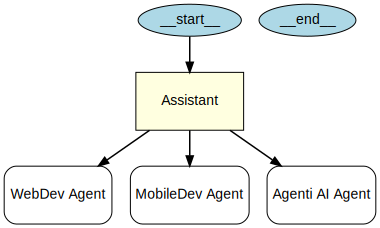

In [6]:
draw_graph(Panacloud)